# ARTIFICAL INTELLIGENCE AND MACHINE LEARNING PROJECT
TOPIC-PHISIHING URL
NAME - HIMANSHI YADAV
ROLL NO.- 22CSU085
SEMESTER-5TH
SECTION-DS-A


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from mpl_toolkits.mplot3d import Axes3D


In [2]:

# Load the dataset
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

# Display dataset information and structure
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

## Data Preprocessing

In [3]:
df=pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

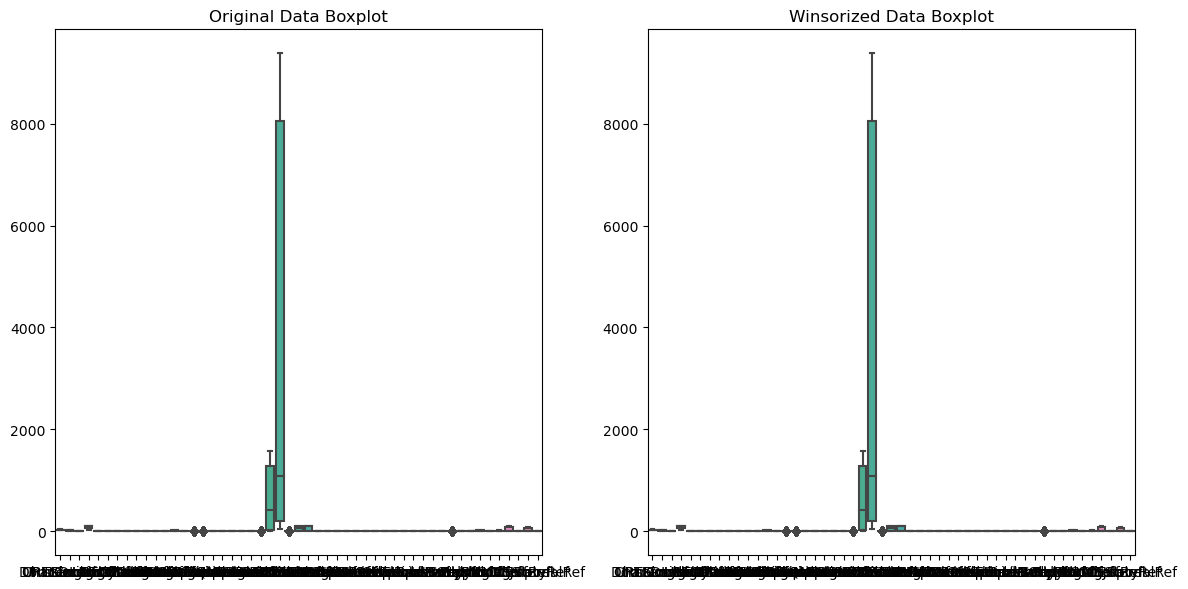


Original Data Descriptive Statistics:
           URLLength   DomainLength  IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000    235795.0       235795.000000   
mean       28.499871      19.865794         0.0           79.659092   
std         5.722911       4.535416         0.0           26.450328   
min        21.000000      13.000000         0.0           30.605286   
25%        23.000000      16.000000         0.0           57.024793   
50%        27.000000      20.000000         0.0          100.000000   
75%        34.000000      24.000000         0.0          100.000000   
max        37.000000      26.000000         0.0          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.857348           0.260491       0.055786       2.706266   
std                0.190858           0.251558       0.007834       0.455473   
m


Number of outliers detected using IQR method (original data):
{'URLLength': 0, 'DomainLength': 0, 'IsDomainIP': 0, 'URLSimilarityIndex': 0, 'CharContinuationRate': 0, 'TLDLegitimateProb': 0, 'URLCharProb': 0, 'TLDLength': 0, 'NoOfSubDomain': 0, 'HasObfuscation': 0, 'NoOfObfuscatedChar': 0, 'ObfuscationRatio': 0, 'NoOfLettersInURL': 0, 'LetterRatioInURL': 0, 'NoOfDegitsInURL': 51461, 'DegitRatioInURL': 51461, 'NoOfEqualsInURL': 0, 'NoOfQMarkInURL': 0, 'NoOfAmpersandInURL': 0, 'NoOfOtherSpecialCharsInURL': 0, 'SpacialCharRatioInURL': 0, 'IsHTTPS': 51256, 'LineOfCode': 0, 'LargestLineLength': 0, 'HasTitle': 32714, 'DomainTitleMatchScore': 0, 'URLTitleMatchScore': 0, 'HasFavicon': 0, 'Robots': 0, 'IsResponsive': 0, 'NoOfURLRedirect': 0, 'NoOfSelfRedirect': 0, 'HasDescription': 0, 'NoOfPopup': 0, 'NoOfiFrame': 0, 'HasExternalFormSubmit': 0, 'HasSocialNet': 0, 'HasSubmitButton': 0, 'HasHiddenFields': 0, 'HasPasswordField': 0, 'Bank': 0, 'Pay': 55885, 'Crypto': 0, 'HasCopyrightInfo': 0, 'NoO

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the dataset (adjust the path to where your CSV file is stored)
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

# Display basic info and the first few rows to understand the structure of the dataset
print(df.info())
print(df.head())

# Identify numeric columns (only apply Winsorization to numeric columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Define the lower and upper percentiles for Winsorization
lower_percentile = 10
upper_percentile = 80

# Function to apply Winsorization
def winsorize_data(df, numeric_columns, lower_pct, upper_pct):
    for col in numeric_columns:
        lower_bound = np.percentile(df[col], lower_pct)
        upper_bound = np.percentile(df[col], upper_pct)
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# Apply Winsorization to the numeric columns of the dataset
winsorized_df = winsorize_data(df.copy(), numeric_columns, lower_percentile, upper_percentile)

# 1. **Boxplot Comparison (Before vs After Winsorization)**
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_columns])
plt.title('Original Data Boxplot')

# Plot winsorized data
plt.subplot(1, 2, 2)
sns.boxplot(data=winsorized_df[numeric_columns])
plt.title('Winsorized Data Boxplot')

plt.tight_layout()
plt.show()

# 2. **Descriptive Statistics Comparison**
print("\nOriginal Data Descriptive Statistics:")
print(df[numeric_columns].describe())

print("\nWinsorized Data Descriptive Statistics:")
print(winsorized_df[numeric_columns].describe())

# 3. **Outlier Detection using Z-Scores (Before and After Winsorization)**
# Calculate Z-scores for original and winsorized data
z_scores_original = np.abs(zscore(df[numeric_columns]))
z_scores_winsorized = np.abs(zscore(winsorized_df[numeric_columns]))

# Detect outliers: typically Z > 3 is considered an outlier
outliers_original = (z_scores_original > 3).sum(axis=0)
outliers_winsorized = (z_scores_winsorized > 3).sum(axis=0)

print("\nNumber of outliers in original data (Z > 3):")
print(outliers_original)

print("\nNumber of outliers in winsorized data (Z > 3):")
print(outliers_winsorized)

# 4. **Outlier Detection using IQR Method (Before and After Winsorization)**
def detect_outliers_iqr(df, numeric_columns):
    outlier_counts = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers
    return outlier_counts

# Apply IQR method before and after Winsorization
outliers_original_iqr = detect_outliers_iqr(df, numeric_columns)
outliers_winsorized_iqr = detect_outliers_iqr(winsorized_df, numeric_columns)

print("\nNumber of outliers detected using IQR method (original data):")
print(outliers_original_iqr)

print("\nNumber of outliers detected using IQR method (winsorized data):")
print(outliers_winsorized_iqr)



In [5]:
urls = df['URL']

In [8]:
df['tokens'] = urls.apply(lambda x: word_tokenize(x.lower()))
print(df['tokens'].head())

0      [https, :, //www.southbankmosaics.com]
1              [https, :, //www.uni-mainz.de]
2        [https, :, //www.voicefmradio.co.uk]
3           [https, :, //www.sfnmjournal.com]
4    [https, :, //www.rewildingargentina.org]
Name: tokens, dtype: object


In [9]:
stop_words = set(stopwords.words('english'))

# Remove stopwords from the tokens
df['tokens_clean'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print(df['tokens_clean'].head())

0      [https, :, //www.southbankmosaics.com]
1              [https, :, //www.uni-mainz.de]
2        [https, :, //www.voicefmradio.co.uk]
3           [https, :, //www.sfnmjournal.com]
4    [https, :, //www.rewildingargentina.org]
Name: tokens_clean, dtype: object


In [10]:
stemmer = PorterStemmer()

# Apply stemming
df['tokens_stemmed'] = df['tokens_clean'].apply(lambda x: [stemmer.stem(word) for word in x])
print(df['tokens_stemmed'].head())

0      [http, :, //www.southbankmosaics.com]
1               [http, :, //www.uni-mainz.d]
2        [http, :, //www.voicefmradio.co.uk]
3           [http, :, //www.sfnmjournal.com]
4    [http, :, //www.rewildingargentina.org]
Name: tokens_stemmed, dtype: object


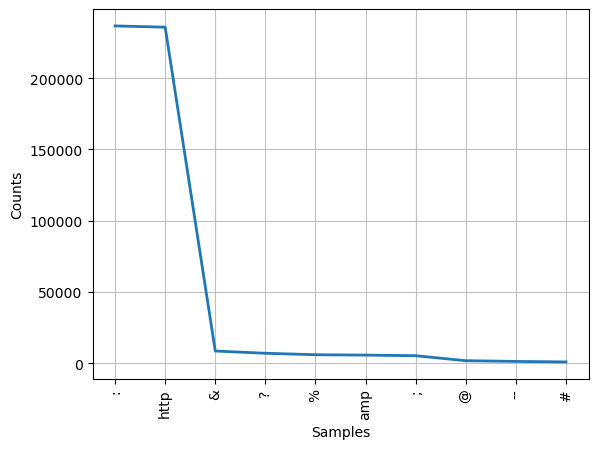

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
all_tokens = [word for tokens_list in df['tokens_stemmed'] for word in tokens_list]
fdist = FreqDist(all_tokens)

# Plot the frequency distribution of the top 10 most frequent words
fdist.plot(10)


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the preprocessed tokens into a string format for vectorization
df['processed_text'] = df['tokens_stemmed'].apply(lambda x: ' '.join(x))

# Use TF-IDF to vectorize the text
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])
print(X_tfidf)
df.shape

# Now, X_tfidf can be used as input features for your machine learning model


  (0, 305)	0.7173849226455676
  (0, 981)	0.5502094313418725
  (0, 498)	0.427350505350428
  (1, 909)	0.981927293745341
  (1, 981)	0.1494692991123644
  (1, 498)	0.11609357613929015
  (2, 908)	0.7406242335925023
  (2, 302)	0.6178734337397516
  (2, 981)	0.20851551140658742
  (2, 498)	0.1619550740082463
  (3, 305)	0.7173849226455676
  (3, 981)	0.5502094313418725
  (3, 498)	0.427350505350428
  (4, 690)	0.9017691549522557
  (4, 981)	0.34134958844255003
  (4, 498)	0.26512798729443154
  (5, 690)	0.9017691549522557
  (5, 981)	0.34134958844255003
  (5, 498)	0.26512798729443154
  (6, 305)	0.7173849226455676
  (6, 981)	0.5502094313418725
  (6, 498)	0.427350505350428
  (7, 305)	0.7173849226455676
  (7, 981)	0.5502094313418725
  (7, 498)	0.427350505350428
  :	:
  (235787, 981)	0.7897625644206905
  (235787, 498)	0.613412660319018
  (235788, 305)	0.7173849226455676
  (235788, 981)	0.5502094313418725
  (235788, 498)	0.427350505350428
  (235789, 572)	0.8150006617820977
  (235789, 514)	0.5394550559662702


(235795, 60)

## Visualizations

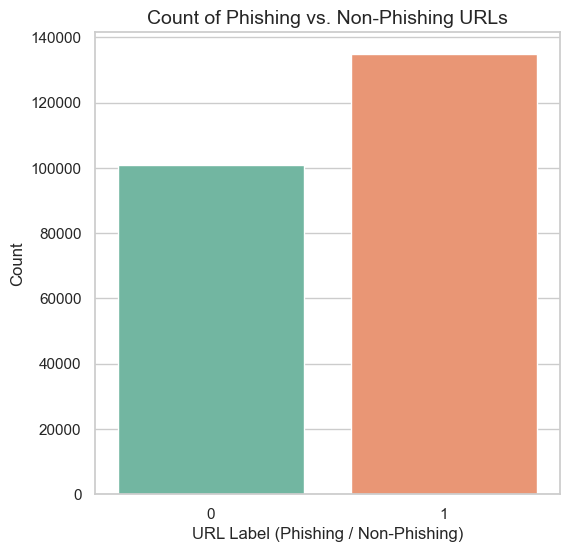

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="whitegrid")  # Optional: setting style for the plot
plt.figure(figsize=(6, 6))  # Optional: set the size of the plot

sns.countplot(x='label', data=df, palette='Set2')  # Create the count plot with the specified column

# Set plot title and labels
plt.title('Count of Phishing vs. Non-Phishing URLs', fontsize=14)
plt.xlabel('URL Label (Phishing / Non-Phishing)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

Correlation Matrix after Winsorization:
                            URLLength  DomainLength  IsDomainIP  \
URLLength                    1.000000      0.792677         NaN   
DomainLength                 0.792677      1.000000         NaN   
IsDomainIP                        NaN           NaN         NaN   
URLSimilarityIndex          -0.614907     -0.276921         NaN   
CharContinuationRate        -0.484904     -0.410099         NaN   
TLDLegitimateProb            0.038490      0.121210         NaN   
URLCharProb                 -0.259145     -0.019972         NaN   
TLDLength                    0.071026      0.154264         NaN   
NoOfSubDomain                     NaN           NaN         NaN   
HasObfuscation                    NaN           NaN         NaN   
NoOfObfuscatedChar                NaN           NaN         NaN   
ObfuscationRatio                  NaN           NaN         NaN   
NoOfLettersInURL             0.965763      0.786169         NaN   
LetterRatioInURL      

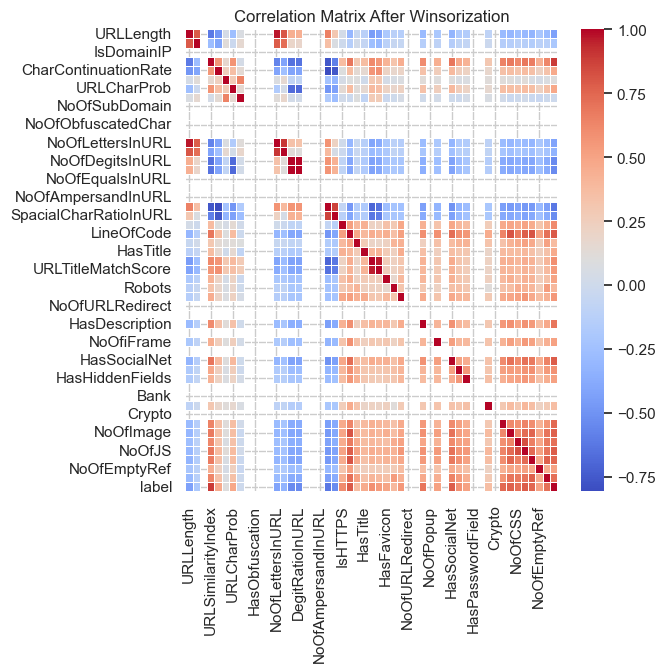

In [12]:
corr_matrix = df[numeric_columns].corr()
print("Correlation Matrix after Winsorization:")
print(corr_matrix)

# Step 5: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix After Winsorization')
plt.show()


## Feature Engineering

[[ 0.43686415  0.91154028  0.         ... -0.634078    1.63812076
   0.86520084]
 [-0.96102881 -0.85235901  0.         ... -0.634078    1.63812076
   0.86520084]
 [ 0.08739091  0.47056546  0.         ...  1.78600006 -0.69778743
   0.86520084]
 ...
 [ 0.26212753  0.69105287  0.         ...  1.78600006  1.31368906
   0.86520084]
 [ 1.48528387  1.3525151   0.         ... -0.634078   -0.86000327
  -1.15580101]
 [ 0.78633739  1.3525151   0.         ... -0.634078    1.63812076
   0.86520084]]
[[-2.82572649  2.27010797 -1.34716564 ... -0.80887977 -0.25445743
  -0.72932309]
 [-2.01731932 -0.05055333  3.21741161 ... -0.81919727  1.52376373
  -0.82508965]
 [-1.02795748  0.63197427  0.77244474 ...  0.99499816 -1.99127916
  -0.15483311]
 ...
 [-4.08496224  1.3899064  -0.20757733 ... -0.61478105 -0.8030146
   0.91783684]
 [ 4.37391689  3.68269191  0.64462146 ...  0.7557146  -0.31646605
  -1.9272282 ]
 [-3.21737196  1.52798897 -2.67010535 ... -0.16167914  0.81787125
  -0.13008137]]
Explained Varianc

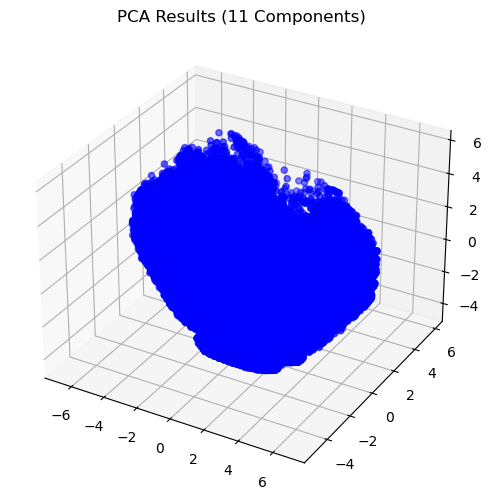

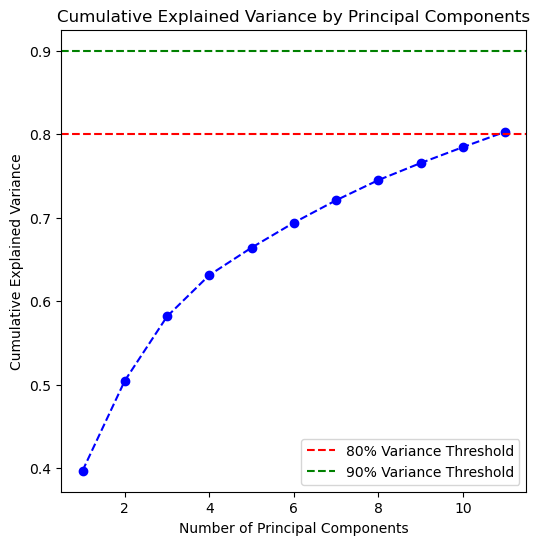

PCA results with 7 components have been saved to 'PhiUSIIL_Phishing_URL_Dataset.csv'.


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(winsorized_df[numeric_columns])
print(scaled_data)

# Step 3: Apply PCA with 5 components
pca = PCA(n_components=11)  # Now retaining 5 components instead of 3
pca_result = pca.fit_transform(scaled_data)
print(pca_result)

# Convert PCA result to DataFrame for easier plotting
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(11)])

# Optionally, check the explained variance ratio (explains how much variance is explained by each principal component)
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
print(f'Cumulative Explained Variance: {np.cumsum(pca.explained_variance_ratio_)}')

# Step 5: Create a 3D scatter plot for the first 3 components
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', marker='o')

ax.set_title('PCA Results (11 Components)')
plt.show()

# Step 6: Create a 3D plot for the first 5 components (if desired)
# However, plotting more than 3 dimensions in 3D is impossible, so visualize the first 3 components as before.
# Optional: you could create a pairplot or matrix plot to view relationships between all 5 components.

# Step 7: Create a cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label="80% Variance Threshold")
plt.axhline(y=0.90, color='g', linestyle='--', label="90% Variance Threshold")
plt.legend(loc='best')
plt.show()

# Optionally, save the PCA results to a new CSV file
pca_df.to_csv('PCA_Result_seven_Components.csv', index=False)
print("PCA results with 7 components have been saved to 'PhiUSIIL_Phishing_URL_Dataset.csv'.")


In [14]:
# Check the number of components needed to explain 80% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1  # Number of components that capture 80% variance
print(f'Number of components to retain 80% variance: {n_components_80}')

Number of components to retain 80% variance: 11


## Machine Learning

# NAIVE BAYES 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

X=X_tfidf
y = df['label'].values  # Assuming the label is binary (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)
print(y_pred)
# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

[1 0 0 ... 1 0 1]
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.71      0.81     20124
           1       0.82      0.97      0.89     27035

    accuracy                           0.86     47159
   macro avg       0.88      0.84      0.85     47159
weighted avg       0.87      0.86      0.85     47159

Confusion Matrix:

[[14297  5827]
 [  905 26130]]


# RANDOM FOREST CLASSIFIER

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = df.label
# Split the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_result, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9990952656950197


SMOTE ANALYSIS WITH NAIVE BAYES

In [19]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Select only numeric columns
X =df[numeric_columns]
y = df['label']  # Replace 'target_column' with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Naive Bayes model on the resampled data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_res, y_train_res)

# Evaluate the model
accuracy = nb_classifier.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')


Model Accuracy: 0.9224331698214563


# SMOTE ANALYSIS WITH RANDOM FOREST CLASSIFIER

In [20]:

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Select only numeric columns
X = df[numeric_columns]
y = df['label']  # Replace 'target_column' with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Naive Bayes model on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)

# Evaluate the model
accuracy = nb_classifier.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

y_pred_rf = clf.predict(X_test)
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_rf))

Model Accuracy: 0.9224331698214563
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30151
           1       1.00      1.00      1.00     40588

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739

Random Forest Confusion Matrix:

[[30151     0]
 [    0 40588]]


# DECISION TREE USING RESULT FROM NAIVE BAYES MODEL

In [30]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Step 2: Reshape y_train and y_pred for stacking
y_train_array = y_train.reshape(-1, 1)  # Convert to 2D array
y_pred_array = y_pred.reshape(-1, 1)   # Convert predictions to 2D array

# Step 3: Combine original TF-IDF features with labels or predictions
X_train_with_nb = np.hstack((X_train.toarray(), y_train_array))  # Add true labels as feature
X_test_with_nb = np.hstack((X_test.toarray(), y_pred_array))    # Add Naive Bayes predictions as feature

# Step 4: Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_with_nb, y_train)  # Train on combined feature set

# Step 5: Make predictions using Decision Tree
y_pred_dt = dt_model.predict(X_test_with_nb)

# Step 6: Evaluate Decision Tree
print("Classification Report (Decision Tree):\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix (Decision Tree):\n")
print(confusion_matrix(y_test, y_pred_dt))


Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       0.94      0.71      0.81     20124
           1       0.82      0.97      0.89     27035

    accuracy                           0.86     47159
   macro avg       0.88      0.84      0.85     47159
weighted avg       0.87      0.86      0.85     47159

Confusion Matrix (Decision Tree):

[[14297  5827]
 [  905 26130]]


# LOGISTIC REGRESSION

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

y=df['label']
    
# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_result, y, test_size=0.3, random_state=42)

# Step 3: Train Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)  # Initialize Logistic Regression
lr.fit(X_train, y_train)                                # Train the model

# Step 4: Make predictions on the test set
y_pred = lr.predict(X_test)

# Step 5: Evaluate the model
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9991

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30151
           1       1.00      1.00      1.00     40588

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



## Evaluation

In [25]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'PC{i+1}' for i in range(pca_result.shape[1])]

# Create the model and train it
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(pca_result, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,  # Manually assign feature names
    'Importance': importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

   Feature  Importance
0      PC1    0.750775
3      PC4    0.056903
10    PC11    0.054541
1      PC2    0.035181
9     PC10    0.023944
5      PC6    0.021900
8      PC9    0.018126
4      PC5    0.016699
7      PC8    0.014399
2      PC3    0.005211
6      PC7    0.002321


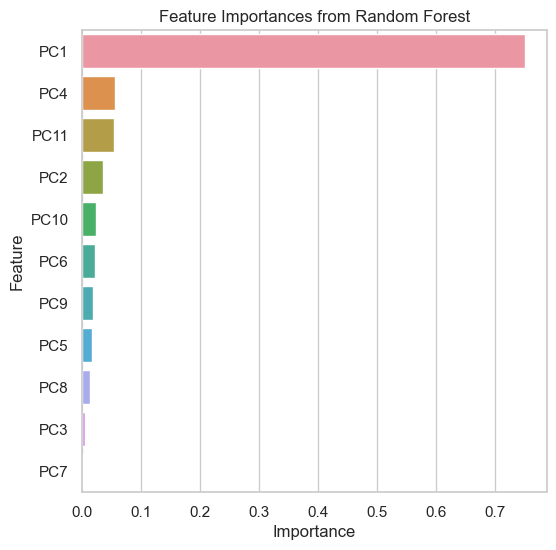

In [26]:
# Plotting the feature importances
plt.figure(figsize=(6, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest')
plt.show()

COUNT PLOT AFTER SMOTE ANALYSIS

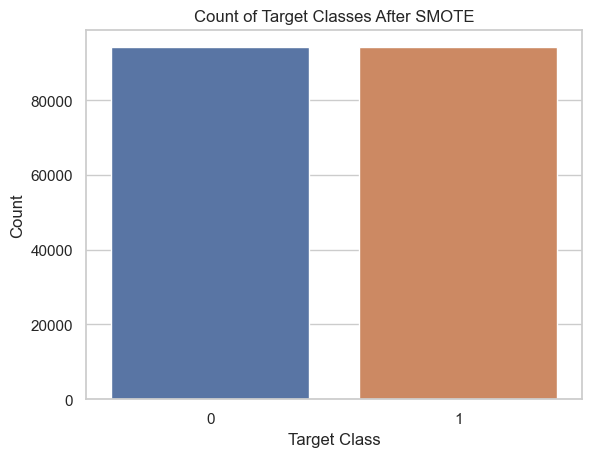

In [36]:
sns.countplot(x=y_train_res)
plt.title('Count of Target Classes After SMOTE')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

## Advanced Analysis

NEURAL NETWORK WITH DECISION TREE AND RANDOM FOREST CLASSIFIER

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Step 2: Train the Neural Network model
nn_model.fit(X_train_with_nb, y_train)

# Step 3: Make predictions using the trained Neural Network
y_pred_nn = nn_model.predict(X_test_with_nb)

# Step 4: Evaluate the Neural Network model
print("Classification Report (Neural Network):\n")
print(classification_report(y_test, y_pred_nn))

print("Confusion Matrix (Neural Network):\n")
print(confusion_matrix(y_test, y_pred_nn))


Classification Report (Neural Network):

              precision    recall  f1-score   support

           0       0.94      0.71      0.81     20124
           1       0.82      0.97      0.89     27035

    accuracy                           0.86     47159
   macro avg       0.88      0.84      0.85     47159
weighted avg       0.87      0.86      0.85     47159

Confusion Matrix (Neural Network):

[[14297  5827]
 [  905 26130]]


In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Step 1: Split the reduced data into training and testing sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Step 2: Initialize the Neural Network (MLPClassifier)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Step 3: Train the Neural Network on the training data
nn_model.fit(X_train, y_train)

# Step 4: Evaluate the model on the test data
accuracy = nn_model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.4f}')

# Step 5: Make predictions on the test set
y_pred = nn_model.predict(X_test)

# Step 6: Print the classification report
print("Classification Report (Neural Network):")
print(classification_report(y_test, y_pred))



Model Accuracy: 0.9995
Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30151
           1       1.00      1.00      1.00     40588

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739

